# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Iniciando o estudo carregando a base de dados disponibilizado
df = pd.read_csv('estrutura.csv', sep=',', decimal=',')
df.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
df.loc[(df['APGAR5'] >= 0) & (df['APGAR5'] <= 3), 'categoria_APGAR5'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'categoria_APGAR5'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'categoria_APGAR5'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) & (df['APGAR5'] <= 10), 'categoria_APGAR5'] = 'normal'

In [4]:
# Verificando se a nova categorização ficou ok
df['categoria_APGAR5']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: categoria_APGAR5, Length: 27028, dtype: object

In [5]:
# Sendo a base de dados muito extensa, verificaremos quantos elementos aparecem em cada categoria
df['categoria_APGAR5'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: categoria_APGAR5, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

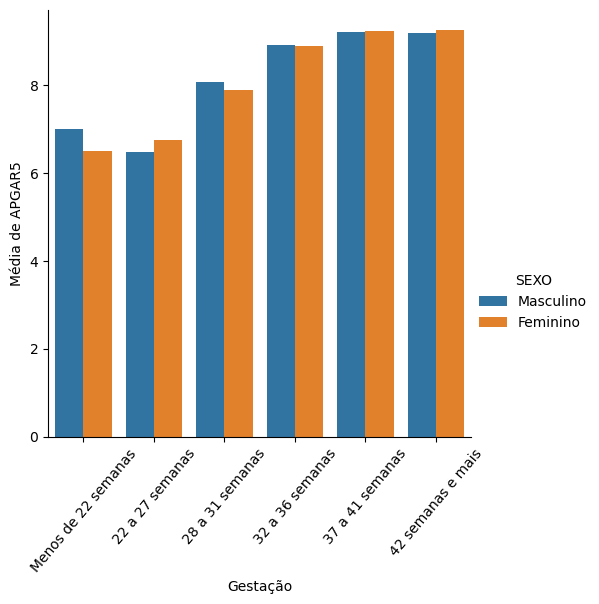

In [7]:
sns.catplot(x='GESTACAO', 
            y='APGAR5',
            hue='SEXO', 
            data=df, 
            order=['Menos de 22 semanas', 
                   '22 a 27 semanas', 
                   '28 a 31 semanas', 
                   '32 a 36 semanas', 
                   '37 a 41 semanas', 
                   '42 semanas e mais'], 
           errorbar=None,
           kind='bar')
plt.xticks(rotation=50)
plt.xlabel(xlabel='Gestação')
plt.ylabel(ylabel="Média de APGAR5")

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [25]:
tabelaCruzada = pd.crosstab(df['GESTACAO'], df['categoria_APGAR5'])
tabelaCruzada

categoria_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


In [24]:
# Categorizando os APGAR5 para ficar mais clara a análise

tabelaCruzada = pd.crosstab(index = df['GESTACAO'], columns = df['categoria_APGAR5'])

tabelaCruzada = tabelaCruzada.reindex(
    index=['Menos de 22 semanas', 
           '22 a 27 semanas', 
           '28 a 31 semanas', 
           '32 a 36 semanas', 
           '37 a 41 semanas', 
           '42 semanas e mais'], 
    columns=['asfixia grave', 
             'asfixia moderada', 
             'asfixia leve', 
             'normal']
)

tabelaCruzada

categoria_APGAR5,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
Menos de 22 semanas,2,0,1,4
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,8,19,73,2134
37 a 41 semanas,33,28,196,22266
42 semanas e mais,1,1,6,690


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [27]:
porcTabCruzada = tabelaCruzada.div(tabelaCruzada.sum(axis=1), axis=0)
print(porcTabCruzada.sum(axis=1))


GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

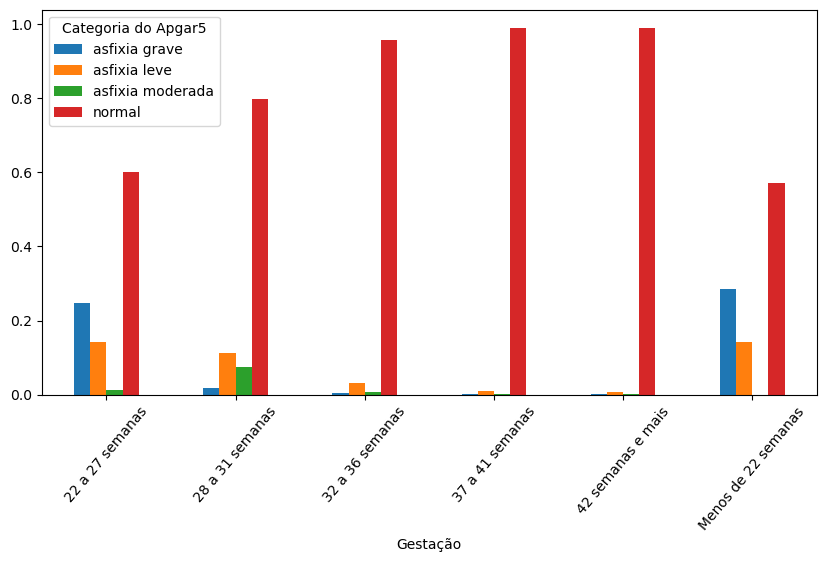

In [32]:
plt.rc('figure', figsize=(10,5))
porcTabCruzada.plot.bar()
plt.xticks(rotation=50)
plt.xlabel(xlabel='Gestação')
plt.legend(title='Categoria do Apgar5')

plt.show()

Como observado pelo gráfico, está correta a afirmativa de que bebês com mais de 37 semanas apresentem menos probabilidade de asfixia (como observado com a alta pontuação do APGAR5). 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Text(-3.9305555555555554, 0.5, 'Peso do bebê em gramas')

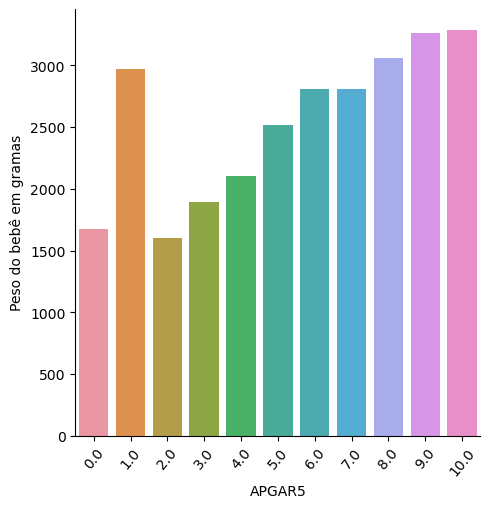

In [51]:
#  Relacionando as variáveis APGAR5 e o PESO do  bebê
sns.catplot(x='APGAR5', y='PESO', data=df, kind = 'bar', errorbar=None)
plt.xticks(rotation=50)
plt.xlabel(xlabel='APGAR5')
plt.ylabel(ylabel='Peso do bebê em gramas')

Text(-3.9305555555555554, 0.5, 'Peso do bebê em gramas')

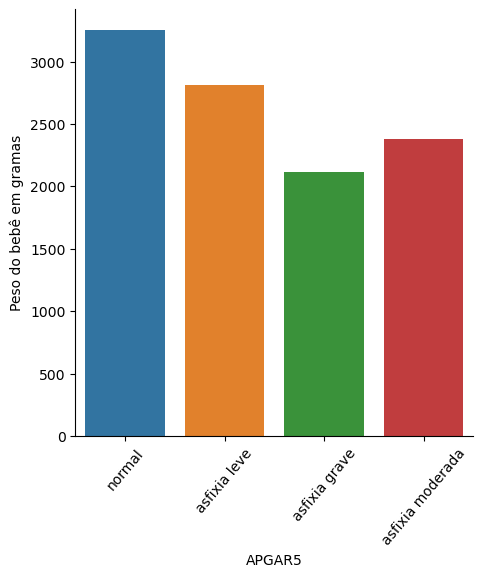

In [50]:
# Fazendo a mesma relação porém com as categorias do APGAR5 definidas
sns.catplot(x='categoria_APGAR5', y='PESO', data=df, kind = 'bar', errorbar=None)
plt.xticks(rotation=50)
plt.xlabel(xlabel='APGAR5')
plt.ylabel(ylabel='Peso do bebê em gramas')


Ao relacionar as variáveis APGAR5 e PESO (do bebê recém nascido), observa-se que quanto maior o peso do bebê menor a chance de asfixia. 